In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image, display  
from sklearn import tree

# Para hacer un muestreo aleatorio
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('numeric_vgsales.csv')

del df['Unnamed: 0']
del df['NA_Sales']
del df['Name']

df.head()

,Platform,Year,Genre,Publisher,Exito
0,0.007857,0.009168,0.002694,0.018233,0.0
1,0.016587,0.009168,0.009429,0.005998,0.0
2,0.007857,0.009163,0.002694,0.020152,0.0
3,0.003492,0.009191,0.010777,0.016554,0.0
4,0.013095,0.009173,0.014818,0.000720,0.0


In [3]:
classes_names = ['no_vendio','vendio']
feats_names = ['Platform','Year','Genre','Publisher']
print(feats_names)

display(df.describe())

featuresDf = df[list(feats_names)]
classesDf = df[list(['Exito'])]


train_features, test_features, train_targets, test_targets = train_test_split(
    featuresDf.values, classesDf.values.ravel(), test_size=0.1)

test_targets = list(test_targets)
train_targets = list(train_targets)

print ("Clases de la muestra de prueba: ", test_targets)

['Platform', 'Year', 'Genre', 'Publisher']


,Platform,Year,Genre,Publisher,Exito
count,11861.000000,11861.000000,11861.000000,11861.000000,11861.000000
mean,0.007835,0.009182,0.008000,0.004891,0.252087
std,0.004787,0.000026,0.004507,0.007771,0.434229
min,0.000873,0.009063,0.001347,0.000120,0.000000
25%,0.004365,0.009168,0.004041,0.000720,0.000000
50%,0.006111,0.009186,0.008082,0.001799,0.000000
75%,0.011349,0.009200,0.012124,0.004558,1.000000
max,0.021824,0.009246,0.016165,0.046662,1.000000


Clases de la muestra de prueba:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_targets)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.210351 to fit



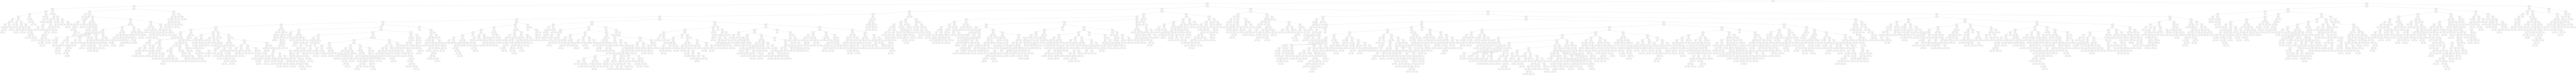

In [5]:
import pydotplus # brew install graphviz, pip install pydotplus
from io import StringIO
from IPython.display import Image, display  

dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile, class_names=classes_names, feature_names=feats_names,
                         filled=False, rounded=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
display(Image(graph.create_png()))

In [6]:


predictions_test = clf.predict(test_features)
fails_test = np.sum(test_targets != predictions_test)
print("Objetivos: ", test_targets)
print("Resultados: ", list(predictions_test))
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_targets), 100*fails_test/len(test_targets)))



Objetivos:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.